<h1>Inferential Statistics Final Project</h1><br>

<h2>Overview</h2><br>
For the Inferential Statistics final project, you are required to perform a detailed analysis on one or more of the provided data sets. With your chosen data set(s) you will come up with a hypothesis which you wish to test. You will then design an experiment to test this hypothesis and choose an appropriate test. For example, you may use t-tests, ANOVA tests, or any other hypothesis test covered in the course. Remember to check the conditions of any test that you choose to use. Once you’ve run your test you will also need to provide visualizations to support your test. These can be any of the visualizations we learned in this course or in Descriptive Statistics (i.e. histogram, box-whisker plot, scatterplot, etc.). Make sure to follow the final project template found below.

When you complete the final project be sure to check through the <a href="https://www.google.com/url?q=https://docs.google.com/document/d/1GyabZyEIFxwt-5_udINmVJG440Cg8Sz0OICf67CUVsc/pub&sa=D&ust=1536668104575000">project rubric</a> before you submit!

Main points to be covered in the final project are as follows:

<ul>
    <li>Introduce the topic related to the data set - why it is important to analyze</li>
    <li>Your research question and hypothesis</li>
    <li>Experimental design - type of analysis and reason for this choice</li>
    <li>Analysis results and data visualizations</li>
    <li>Conclusion - what you learned and what are the real life implications</li>
</ul>

<h2>Datasets</h2><br>
Examples of datasets that you may use for your final project may be found in <a href="https://docs.google.com/document/d/1OUSSC0GjWwmOlpu6tWVJ-s82rfivAGiJwJyMIz_1BdE/pub">this document</a>.

<h2>We will apply what we learned on the Haberman's Survival Dataset</h2>

<h2>Introduction</h2><br>
Breast cancer is the most common invasive cancer in women, and the second main cause of cancer death in women, after lung cancer. Knowing more about this disease will have a huge impact on people's lives.

    1. Title: Haberman's Survival Data

    2. Sources:
       (a) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
       (b) Date:    March 4, 1999

    3. Past Usage:
       1. Haberman, S. J. (1976). Generalized Residuals for Log-Linear
          Models, Proceedings of the 9th International Biometrics
          Conference, Boston, pp. 104-122.
       2. Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
          Graphical Models for Assessing Logistic Regression Models (with
          discussion), Journal of the American Statistical Association 79:
          61-83.
       3. Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
          Department of Statistics, University of Wisconsin, Madison, WI.

    4. Relevant Information:
       The dataset contains cases from a study that was conducted between
       1958 and 1970 at the University of Chicago's Billings Hospital on
       the survival of patients who had undergone surgery for breast
       cancer.

    5. Number of Instances: 306

    6. Number of Attributes: 4 (including the class attribute)

    7. Attribute Information:
       1. Age of patient at time of operation (numerical)
       2. Patient's year of operation (year - 1900, numerical)
       3. Number of positive axillary nodes detected (numerical)
       4. Survival status (class attribute)
             1 = the patient survived 5 years or longer
             2 = the patient died within 5 year

    8. Missing Attribute Values: None

Lets now load our dataset and explore it

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline

In [63]:
ds_path='/Users/karimafifi/Desktop/haberman.csv'
df=pd.read_csv(ds_path, header = None, names=['Patient_Age', 'Operation_Year', 'Num_of_Positive_Axillary', 'Survival_Status'])
df.head()

,Patient_Age,Operation_Year,Num_of_Positive_Axillary,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [64]:
df.shape

(306, 4)

In [65]:
df.isnull().values.any()

False

In [66]:
df.describe()

,Patient_Age,Operation_Year,Num_of_Positive_Axillary,Survival_Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [67]:
df['Survival_Status'].value_counts()

1    225
2     81
Name: Survival_Status, dtype: int64

In [68]:
df['Survival_Status'] = df['Survival_Status'].map(lambda x: '1' if (x == 1) else '0')

In [69]:
df.dtypes

Patient_Age                  int64
Operation_Year               int64
Num_of_Positive_Axillary     int64
Survival_Status             object
dtype: object

<h3>Research Question 1</h3><br>
Are patients with younger age at time of operation more likely to survive?<br>
<b>H<sub>0</sub></b>: There is no relationship between the age of the patient at the time of operation and the survival status. u<sub>1</sub> - u<sub>2</sub> = 0<br>
<b>H<sub>a</sub></b>: Patients with younger age at the time of operation are more likely to survive. u<sub>1</sub> - u<sub>2</sub> < 0<br>

We need to perform two samples t-test in order to determine if the difference between the two sample means is statistically significant or not. Our samples are independent so a two samples independent t-test would be appropriate. Lets first check if the conditions for applying the statistical test are present.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


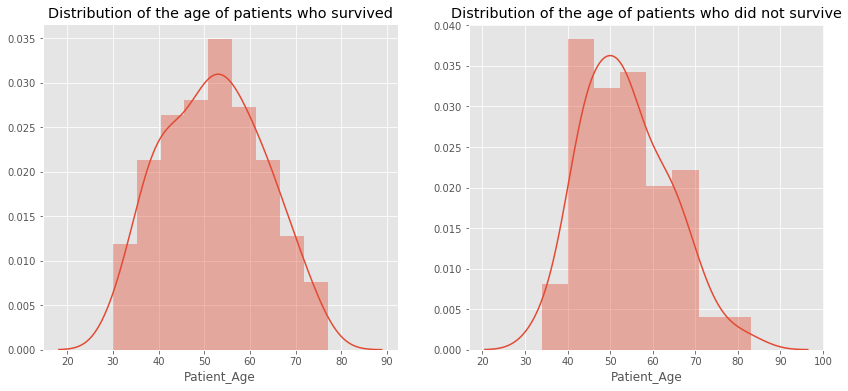

In [72]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize = (14, 6))

ax1.set(title = 'Distribution of the age of patients who survived')
sns.distplot(df['Patient_Age'][df['Survival_Status']=='1'], ax=ax1)

ax2.set(title = 'Distribution of the age of patients who did not survive')
sns.distplot(df['Patient_Age'][df['Survival_Status']=='0'], ax=ax2)


[Text(0.5,1,'Patient Age by Survival Status')]

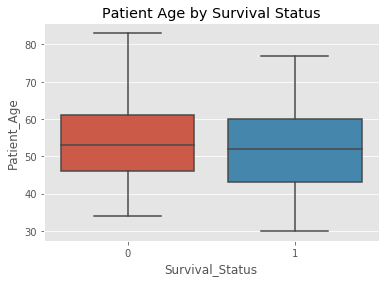

In [73]:
ax=sns.boxplot(x = df['Survival_Status'], y = df['Patient_Age'])
ax.set(title = 'Patient Age by Survival Status')

In [77]:
print('The mean age of patients who survived: {}'.format(df['Patient_Age'][df['Survival_Status']=='1'].mean()))
print('The mean age of patients who did not survive: {}'.format(df['Patient_Age'][df['Survival_Status']=='0'].mean()))

The mean age of patients who survived: 52.01777777777778
The mean age of patients who did not survive: 53.67901234567901


The two samples do not violate any normality assumptions, they are approximately normal with no extreme skewness or outliers. We are going to also assume that the two samples are random. Also, the two samples have larger than 30 number of observations. The mean age of patients who survived is slightly smaller than those who did not.

Lets now check if this is due to real difference between the two means or due to sampling variability. We are going to use 5% as our significance level.

In [93]:
import scipy as sp

twosample_results = sp.stats.ttest_ind(df['Patient_Age'][df['Survival_Status']=='1'], df['Patient_Age'][df['Survival_Status']=='0'])

matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results[0], twosample_results[1]/2]
]

matrix_twosample

[['', 'Test Statistic', 'p-value'],
 ['Sample Data', -1.1874990487687174, 0.11797892563414822]]

With a 5% level of significance and a p-value of 0.11798 and a t-statistic that is not extreme, we do not have enough statistical evidence to reject the null hypothesis.

<h3>Research Question 2</h3><br>
Are patients with lower number of positive axillary nodes detected before operation more likely to survive?<br>
<b>H<sub>0</sub></b>: There is no relationship between the number of positive axillary nodes detected and survival status. u<sub>1</sub> - u<sub>2</sub> = 0<br>

<b>H<sub>a</sub></b>: Patients with lower number of positive axillary nodes detected before operation more likely to survive. u<sub>1</sub> - u<sub>2</sub> < 0<br>

We need to perform two samples t-test in order to determine if the difference between the two sample means is statistically significant or not. Our samples are independent so a two samples independent t-test would be appropriate. Lets first check if the conditions for applying the statistical test are present.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


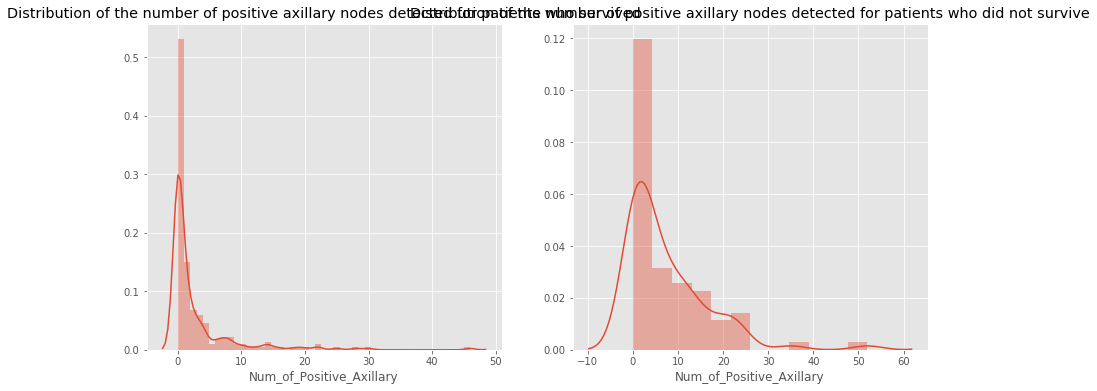

In [94]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize = (14, 6))

ax1.set(title = 'Distribution of the number of positive axillary nodes detected for patients who survived')
sns.distplot(df['Num_of_Positive_Axillary'][df['Survival_Status']=='1'], ax=ax1)

ax2.set(title = 'Distribution of the number of positive axillary nodes detected for patients who did not survive')
sns.distplot(df['Num_of_Positive_Axillary'][df['Survival_Status']=='0'], ax=ax2)

[Text(0.5,1,'Num of positive axillary detected by Survival Status')]

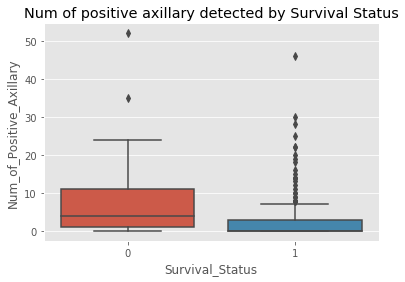

In [95]:
ax=sns.boxplot(x = df['Survival_Status'], y = df['Num_of_Positive_Axillary'])
ax.set(title = 'Num of positive axillary detected by Survival Status')

Even though our samples are not normal with much skewness and outliers, we are going to proceed with our statistical test since our sample is > 30

In [98]:
print('The mean number of positive axillary nodes of patients who survived: {}'.format(df['Num_of_Positive_Axillary'][df['Survival_Status']=='1'].mean()))
print('The mean number of positive axillary nodes of patients who did not survive: {}'.format(df['Num_of_Positive_Axillary'][df['Survival_Status']=='0'].mean()))


The mean number of positive axillary nodes of patients who survived: 2.7911111111111113
The mean number of positive axillary nodes of patients who did not survive: 7.45679012345679


The mean number of positive axillary nodes of patients who survived is smaller than those who did not.

Lets now check if this is due to real difference between the two means or due to sampling variability. We are going to use 5% as our significance level.

In [99]:
twosample_results = sp.stats.ttest_ind(df['Num_of_Positive_Axillary'][df['Survival_Status']=='1'], df['Num_of_Positive_Axillary'][df['Survival_Status']=='0'])

matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results[0], twosample_results[1]/2]
]

matrix_twosample

[['', 'Test Statistic', 'p-value'],
 ['Sample Data', -5.219167426001108, 1.667692558330104e-07]]

With an extreme t-statistic value and very small p-value, we can safely reject the null hypothesis and conclude that indeed, patients with lower number of positive axillary nodes detected before operation are more likely to survive.

<h3>Research Question 3</h3><br>
Is there a relationship between the age of patient at time of operation and the number of positive axillary nodes detected?<br>
<b>H<sub>0</sub></b>: There is no relationship between the age of patient at time of operation and the number of positive axillary nodes detected. r = 0<br>

<b>H<sub>a</sub></b>: There is a relationship between the age of patient at time of operation and the number of positive axillary nodes detected. r &ne; 0<br>

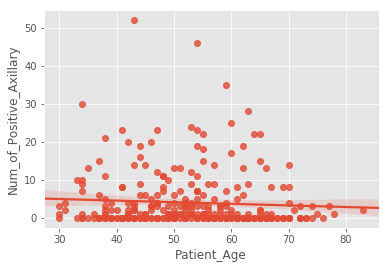

In [100]:
sns.regplot(df['Patient_Age'], df['Num_of_Positive_Axillary'])

In [101]:
sp.stats.pearsonr(df['Patient_Age'], df['Num_of_Positive_Axillary'])

(-0.06317610238980065, 0.270588471285462)

As we can see from the above results, the negative linear correlation between the two variables is pretty weak and the p-value is also higher than 5% significance level so we fail to reject the null hypothesis.